In [303]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [304]:
device = "gpu" if torch.cuda.is_available() else "cpu"

torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

In [305]:
class LinearRegressionModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1  )
       
    def  forward(self,x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
def plotting(x,y,predictions = None):
    plt.scatter(x,y,c = "r")
    if predictions is not None:
        plt.scatter(x,predictions,c = "b")



In [306]:
torch.manual_seed(42)
model = LinearRegressionModelv2()

model, model.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [307]:
next(model.parameters()).device

device(type='cpu')

In [308]:
model.to(device)
next(model.parameters()).device

device(type='cpu')

In [309]:

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

X.to(device)
y.to(device)

split_percentage = int(0.8*len(X))
X_train , y_train = X[:split_percentage], y[:split_percentage]
X_test,y_test = X[split_percentage:], y[split_percentage:]

print(X_train.shape,y_train.shape)
X_train.to(device)
X_test.to(device)
y_train.to(device)
y_test.to(device)


torch.Size([40, 1]) torch.Size([40, 1])


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

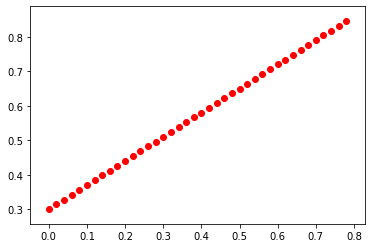

In [310]:
plotting(X_train,y_train)

In [311]:
model = LinearRegressionModelv2()
list(model.parameters())

[Parameter containing:
 tensor([[-0.2343]], requires_grad=True),
 Parameter containing:
 tensor([0.9186], requires_grad=True)]

In [312]:
loss = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.01,momentum = 0.9)

In [313]:
torch.manual_seed(42)
epochs  = 90
epoch_set = []
train_loss = []
test_loss = []
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
  
    loss1 = loss(y_preds,y_train)
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()
    model.eval()
    epoch_set.append(epoch)
    train_loss.append(loss1.item())
    with torch.inference_mode():
        y_preds_test = model(X_test)
        loss2 = loss(y_preds_test,y_test)
        test_loss.append(loss2.item())
    print("Epoch: {}, Train Loss: {}, Test Loss: {}".format(epoch,loss1.item(),loss2.item()))
    
    
    
    

Epoch: 0, Train Loss: 0.27326732873916626, Test Loss: 0.22141309082508087
Epoch: 1, Train Loss: 0.2683817744255066, Test Loss: 0.23681099712848663
Epoch: 2, Train Loss: 0.259763240814209, Test Loss: 0.2576124966144562
Epoch: 3, Train Loss: 0.24901609122753143, Test Loss: 0.2825013995170593
Epoch: 4, Train Loss: 0.23741212487220764, Test Loss: 0.31030187010765076
Epoch: 5, Train Loss: 0.22593466937541962, Test Loss: 0.3399646282196045
Epoch: 6, Train Loss: 0.2156098186969757, Test Loss: 0.3698141276836395
Epoch: 7, Train Loss: 0.20701655745506287, Test Loss: 0.399100124835968
Epoch: 8, Train Loss: 0.2004530131816864, Test Loss: 0.4264429211616516
Epoch: 9, Train Loss: 0.1958792358636856, Test Loss: 0.4513321816921234
Epoch: 10, Train Loss: 0.19293956458568573, Test Loss: 0.47263050079345703
Epoch: 11, Train Loss: 0.19150637090206146, Test Loss: 0.49001893401145935
Epoch: 12, Train Loss: 0.19086328148841858, Test Loss: 0.5032195448875427
Epoch: 13, Train Loss: 0.190541073679924, Test Los

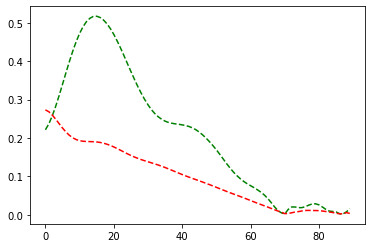

In [314]:
def plot_epoch_loss(epoch,loss,color):
    plt.plot(epoch,loss,color)
plot_epoch_loss(epoch_set,test_loss,color = "g--")
plot_epoch_loss(epoch_set,train_loss,color = "r--")

<ipython-input-315-e2eb48cfb87b>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds).numpy()


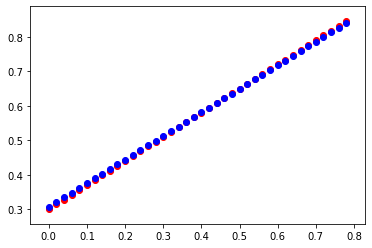

In [315]:
y_preds = torch.tensor(y_preds).numpy()
plotting(X_train,y_train,predictions = y_preds)

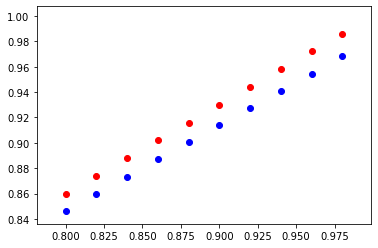

In [316]:
plotting(X_test, y_test,predictions = y_preds_test)

In [317]:
list(model.parameters())

[Parameter containing:
 tensor([[0.6767]], requires_grad=True),
 Parameter containing:
 tensor([0.3049], requires_grad=True)]

In [318]:
torch.save(model,"models/Linear_modelv2.pt")

In [319]:
torch.save(model.state_dict(),"models/linear_v2_statedict.pt")

In [320]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6767]])),
             ('linear_layer.bias', tensor([0.3049]))])

LOAD A MODEL

In [321]:
model3 = LinearRegressionModelv2()

model3.load_state_dict(torch.load("models/linear_v2_statedict.pt"))

list(model3.parameters())

[Parameter containing:
 tensor([[0.6767]], requires_grad=True),
 Parameter containing:
 tensor([0.3049], requires_grad=True)]

In [322]:
model.eval()
with torch.inference_mode():
    y_pred1 = model3(X_test)
    loss5 = loss(y_pred1, y_test)
    print(loss5)
    


tensor(0.0158)


In [323]:
y_preds_test == y_pred1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])